In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import geopandas as gpd
init_notebook_mode(connected=True)

In [121]:
city = gpd.read_file('bcim_2016_21_11_2018.gpkg',layer= 'lim_unidade_federacao_a')

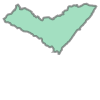

In [122]:
city.geometry[5]

In [101]:
city.nome[1]

'Ouricuri'

In [125]:
city

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,Alagoas,None,Sim,AL,27,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,Tocantins,None,Sim,TO,17,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,Roraima,None,Sim,RR,14,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,Amazonas,None,Sim,AM,13,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,Acre,None,Sim,AC,12,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


In [123]:
data= pd.read_csv('brazil_covid19.csv')

In [126]:
data

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0
...,...,...,...,...,...
3613,2020-07-07,Sudeste,RJ,124086,10881
3614,2020-07-07,Sudeste,SP,332708,16475
3615,2020-07-07,Sul,PR,34308,851
3616,2020-07-07,Sul,RS,33800,791


In [127]:
data.rename({'state':'sigla'}, axis=1,inplace=True)

In [128]:
data

,date,region,sigla,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0
...,...,...,...,...,...
3613,2020-07-07,Sudeste,RJ,124086,10881
3614,2020-07-07,Sudeste,SP,332708,16475
3615,2020-07-07,Sul,PR,34308,851
3616,2020-07-07,Sul,RS,33800,791


In [129]:
data1=data.groupby('sigla').sum()

In [130]:
data1

,cases,deaths
sigla,,
AC,486157,12999
AL,1112566,38045
AM,2954890,140140
AP,922928,16880
BA,2145636,61767
CE,4154219,250008
DF,1366970,18140
ES,1495252,56642
GO,623439,14758


In [131]:
x = city.merge(data1,on= 'sigla', how='left')

In [132]:
x

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry,cases,deaths
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",623439,14758
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",218131,2505
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",664491,21820
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",1300086,30913
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",769708,18974
5,Alagoas,None,Sim,AL,27,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",1112566,38045
6,Tocantins,None,Sim,TO,17,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...",355961,6767
7,Roraima,None,Sim,RR,14,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...",427859,10422
8,Amazonas,None,Sim,AM,13,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...",2954890,140140
9,Acre,None,Sim,AC,12,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...",486157,12999


In [112]:
x.drop(['nomeabrev','geometriaaproximada','geocodigo','anodereferencia','id_produtor','id_elementoprodutor','cd_insumo_orgao','nr_insumo_mes','nr_insumo_ano','tx_insumo_documento','code'],axis=1,inplace=True)

In [92]:
x.dropna(inplace=True)

,nome,geometry,cases,deaths
0,Goiás,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",144.0,0.0
1,Mato Grosso do Sul,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",NaN,NaN
2,Paraná,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",172.0,0.0
3,Minas Gerais,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",NaN,NaN
4,Sergipe,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",NaN,NaN
5,Alagoas,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",NaN,NaN
6,Tocantins,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...",1005.0,0.0
7,Roraima,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...",NaN,NaN
8,Amazonas,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...",NaN,NaN
9,Acre,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...",NaN,NaN


In [117]:
x

,nome,geometry,cases,deaths
0,Santanópolis,"MULTIPOLYGON (((-38.82489 -11.94361, -38.81343...",650.0,0.0
1,Ouricuri,"MULTIPOLYGON (((-40.21253 -7.67760, -40.16243 ...",2465.0,116.0
2,Curvelândia,"MULTIPOLYGON (((-57.86510 -15.48355, -57.85853...",519.0,284.0
3,Balneário Rincão,"MULTIPOLYGON (((-49.21224 -28.77150, -49.21120...",362.0,9.0
4,Jaguaruna,"MULTIPOLYGON (((-49.02742 -28.53153, -49.02365...",1291.0,0.0
...,...,...,...,...
5565,Guarujá,"MULTIPOLYGON (((-46.14783 -23.90495, -46.14815...",114200.0,4546.0
5566,Bertioga,"MULTIPOLYGON (((-45.83320 -23.64470, -45.82888...",12315.0,500.0
5567,Vitória,"MULTIPOLYGON (((-29.30057 -20.51489, -29.30025...",251889.0,9075.0
5568,Fernando de Noronha,"MULTIPOLYGON (((-32.39418 -3.82257, -32.39523 ...",4221.0,0.0


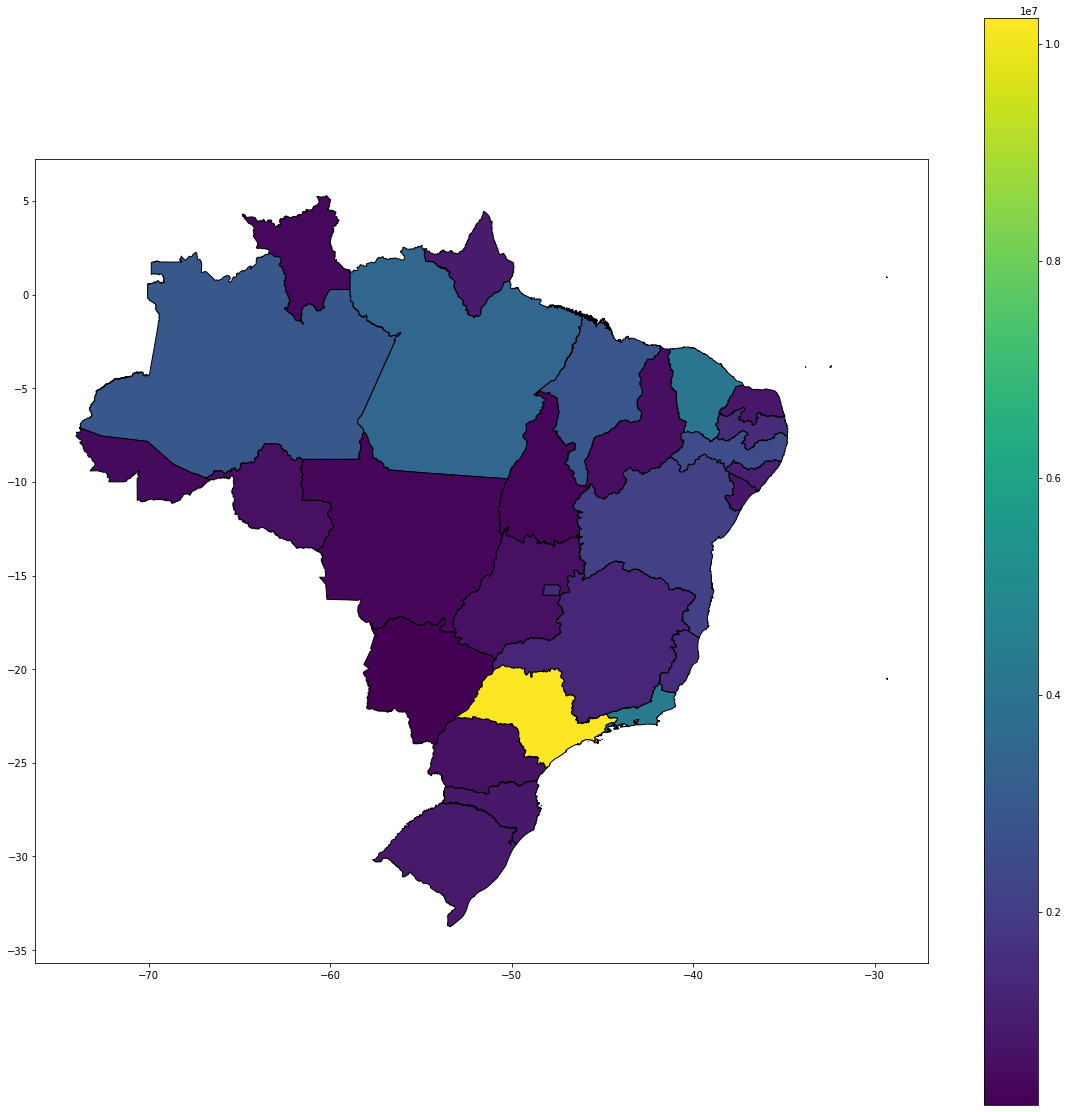

In [134]:
x.plot(column='cases',
       figsize=(20,20),
       legend= True,
       edgecolor='black')

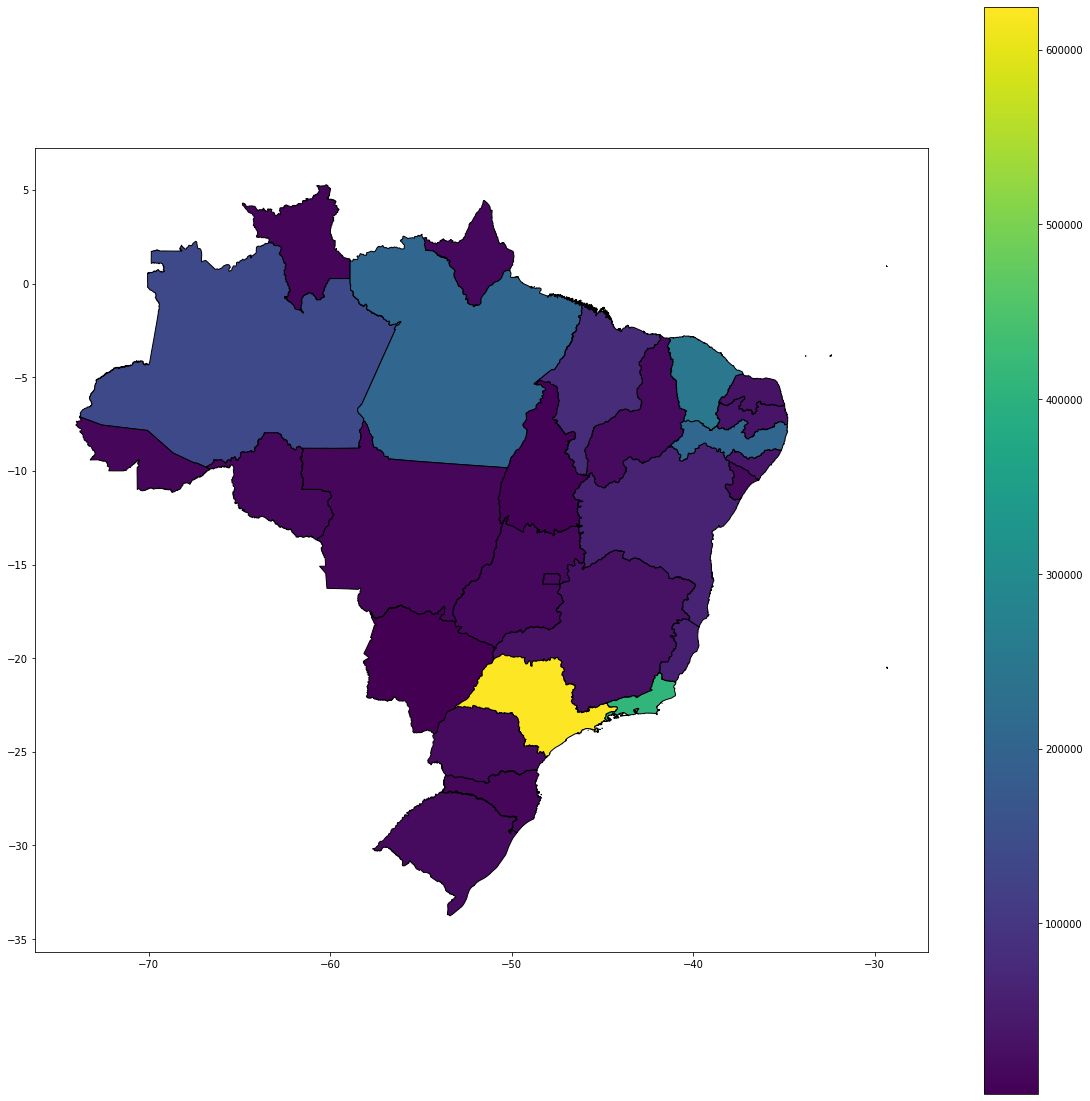

In [137]:
x.plot(column='deaths',
       figsize=(20,20),
       legend= True,
       edgecolor='black')